In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from Bio.Seq import Seq
from Bio import SeqIO
import os 
from sklearn import metrics
# 读取 CSV 文件
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import os,sys
import numpy as np
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
warnings.filterwarnings("ignore")
from pathlib import Path
import json


In [34]:
# 构建数据
data = {
    "Metric": ["AUC", "ACC", "F1", "MCC", "AUC", "ACC", "F1", "MCC"],
    "Value": [0.817, 0.719, 0.676, 0.451, 
             0.7549, 0.6742, 0.6436, 0.3836],
    "Method": ["Expression-aware embeddings"] * 4 + ["General embeddings"] * 4
}

df = pd.DataFrame(data)

In [30]:
df

,Metric,Mean,Method
0,AUC,0.8170,Expression-aware embeddings
1,ACC,0.7190,Expression-aware embeddings
2,F1,0.6760,Expression-aware embeddings
3,MCC,0.4510,Expression-aware embeddings
4,AUC,0.7549,General embeddings
5,ACC,0.6742,General embeddings
6,F1,0.6436,General embeddings
7,MCC,0.3836,General embeddings


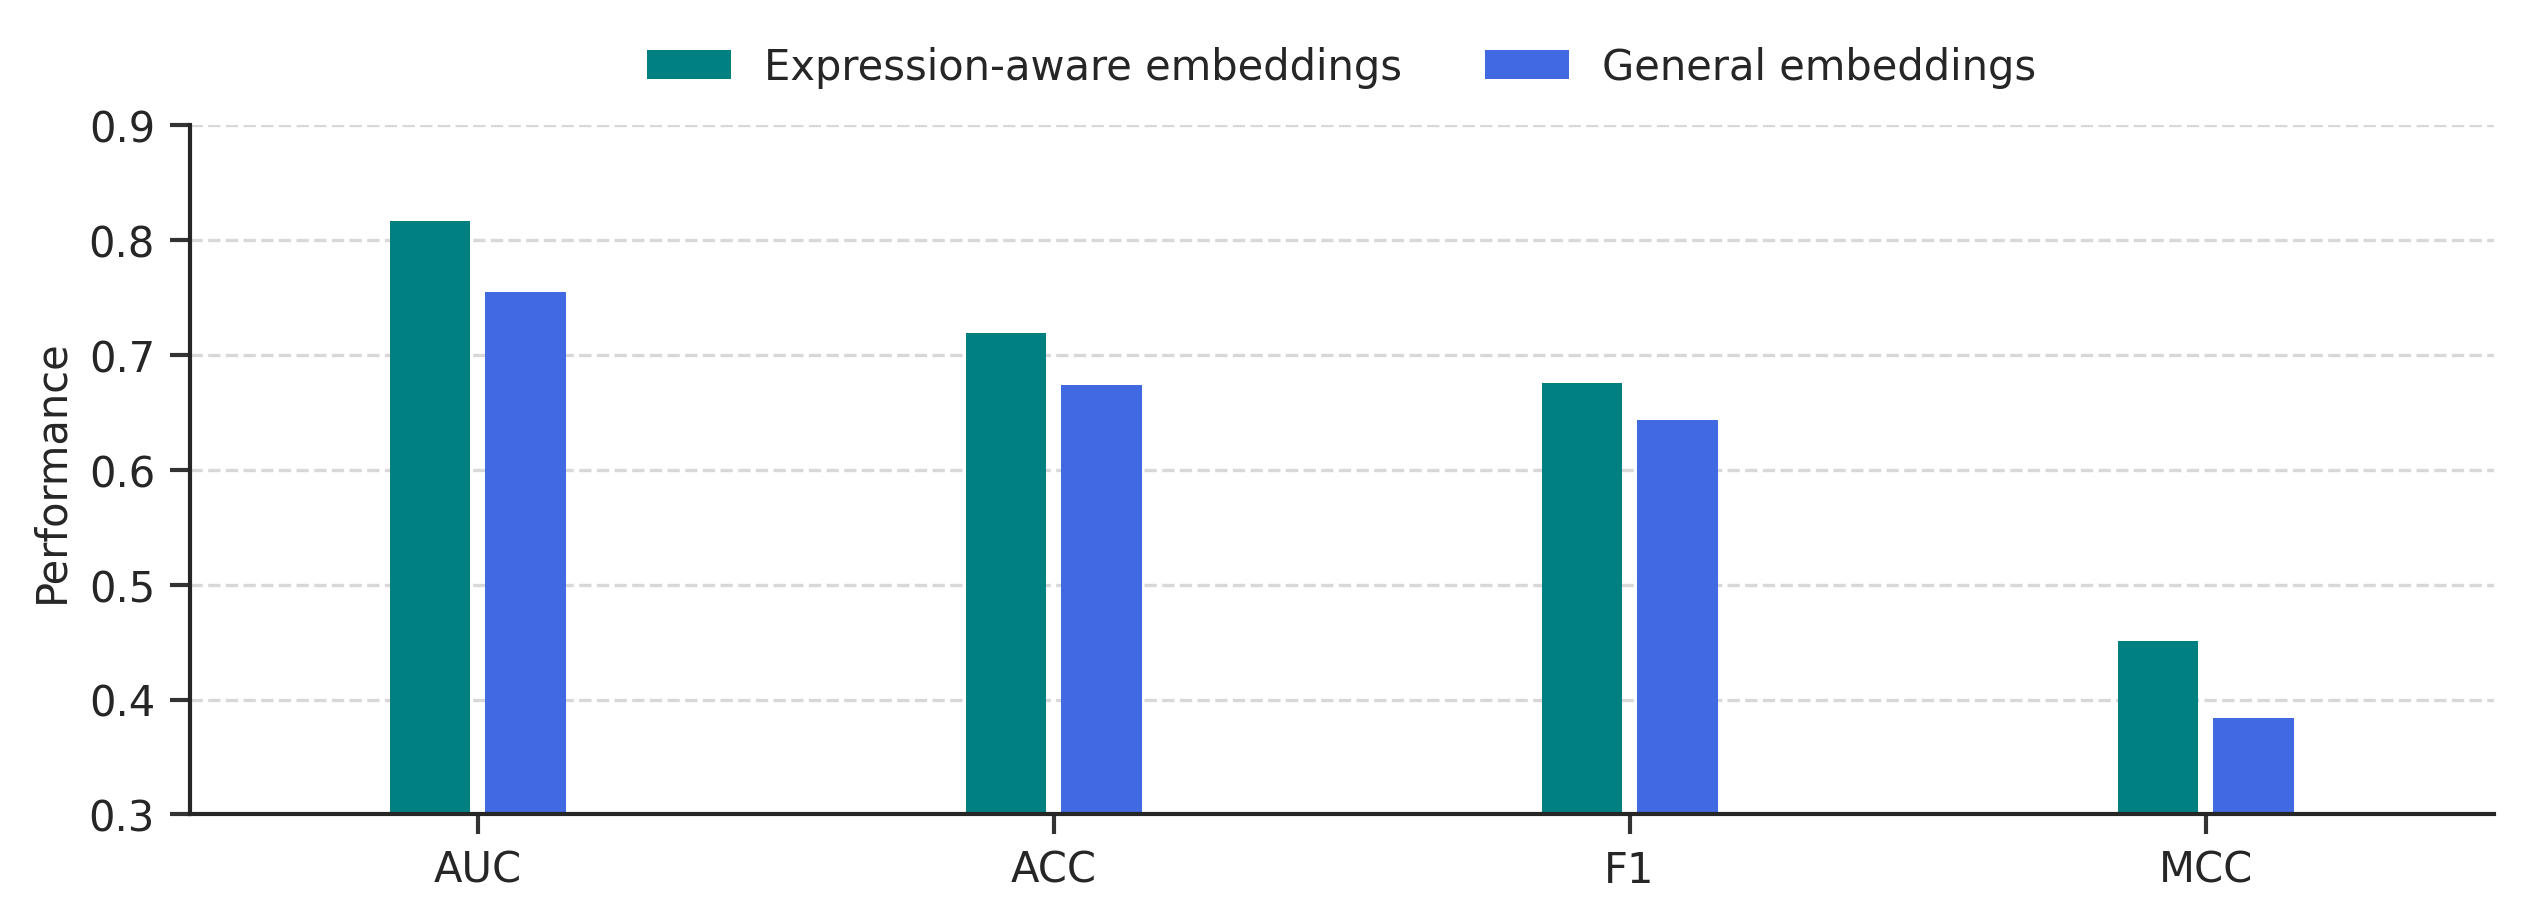

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import numpy as np
from matplotlib.patches import Rectangle
import pandas as pd

# 设置出版级样式
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
sns.set_theme(style="ticks", context="paper")

# ✅ 新的颜色方案 - 保持专业风格但与之前区分
custom_palette = [
    '#008080',  # Bright Blue - TLC-EPE
    '#4169E1',  # Purple - TLCP-EPE
    '#B22222',   # Orange - TLP-EPE
    '#A9A9A9'
]


label_fontsize = 10
tick_labelsize = 10
title_fontsize = 10

metrics_order = ['AUC', 'ACC', 'F1', 'MCC']

# ========== 创建图形 ==========
# fig, ax = plt.subplots(
#     1, 1,
#     figsize=(10, 2.25),
#     dpi=300
# )

fig, ax = plt.subplots(
    1, 1,
    figsize=(8.5, 3.8),
    dpi=300
)

# ========== 绘制条形图 ==========
bar = sns.barplot(
    x="Metric", y="Mean", hue="Method", data=df,
    palette=custom_palette,
    ax=ax,
    linewidth=0,
    width=0.33,
    saturation=1.0,
    dodge=True,
    gap=0.15
)


# 设置 y 轴
ax.set_ylim(0.3, 0.9)
y_ticks = np.linspace(0.3, 0.9, 5)
ax.set_yticks(y_ticks)
ax.set_yticks(np.arange(0.3, 0.91, 0.1))
ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
ax.set_ylabel("Performance", fontsize= label_fontsize )
ax.set_xlabel("")

# 刻度和网格
ax.tick_params(axis='both', labelsize=tick_labelsize, color='#333333')
ax.grid(True, axis='y', linestyle='--', color='gray', alpha=0.3, linewidth=0.8)
ax.set_axisbelow(True)

# 设置 x 轴标签
ax.set_xticklabels(metrics_order, rotation=0)

# 去掉上边框和右边框
sns.despine(ax=ax, top=True, right=True)


# ========== 创建横向图例 ==========
custom_patches = [
    Rectangle((0, 0), 1, 1, facecolor=custom_palette[i], linewidth=0)
    for i in range(3)
]

labels = ['Expression-aware embeddings', 'General embeddings']   

ax.legend(
    custom_patches,
    labels,
    loc='upper center',
    ncol=3,  # 横向排列
    fontsize=10,
    title_fontsize=11,
    frameon=False,
    bbox_to_anchor=(0.5, 1.17)  # 调整位置到图表上方
)

# ========== 布局调整 ==========
plt.tight_layout(rect=[0, 0.06, 1, 0.92])

# ========== 保存 ==========
plt.savefig("model_comparison_barplot_single.pdf", dpi=300, bbox_inches='tight')
plt.savefig("model_comparison_barplot_single.png", dpi=300, bbox_inches='tight')

plt.show()

ValueError: Could not interpret value `Model` for `hue`. An entry with this name does not appear in `data`.

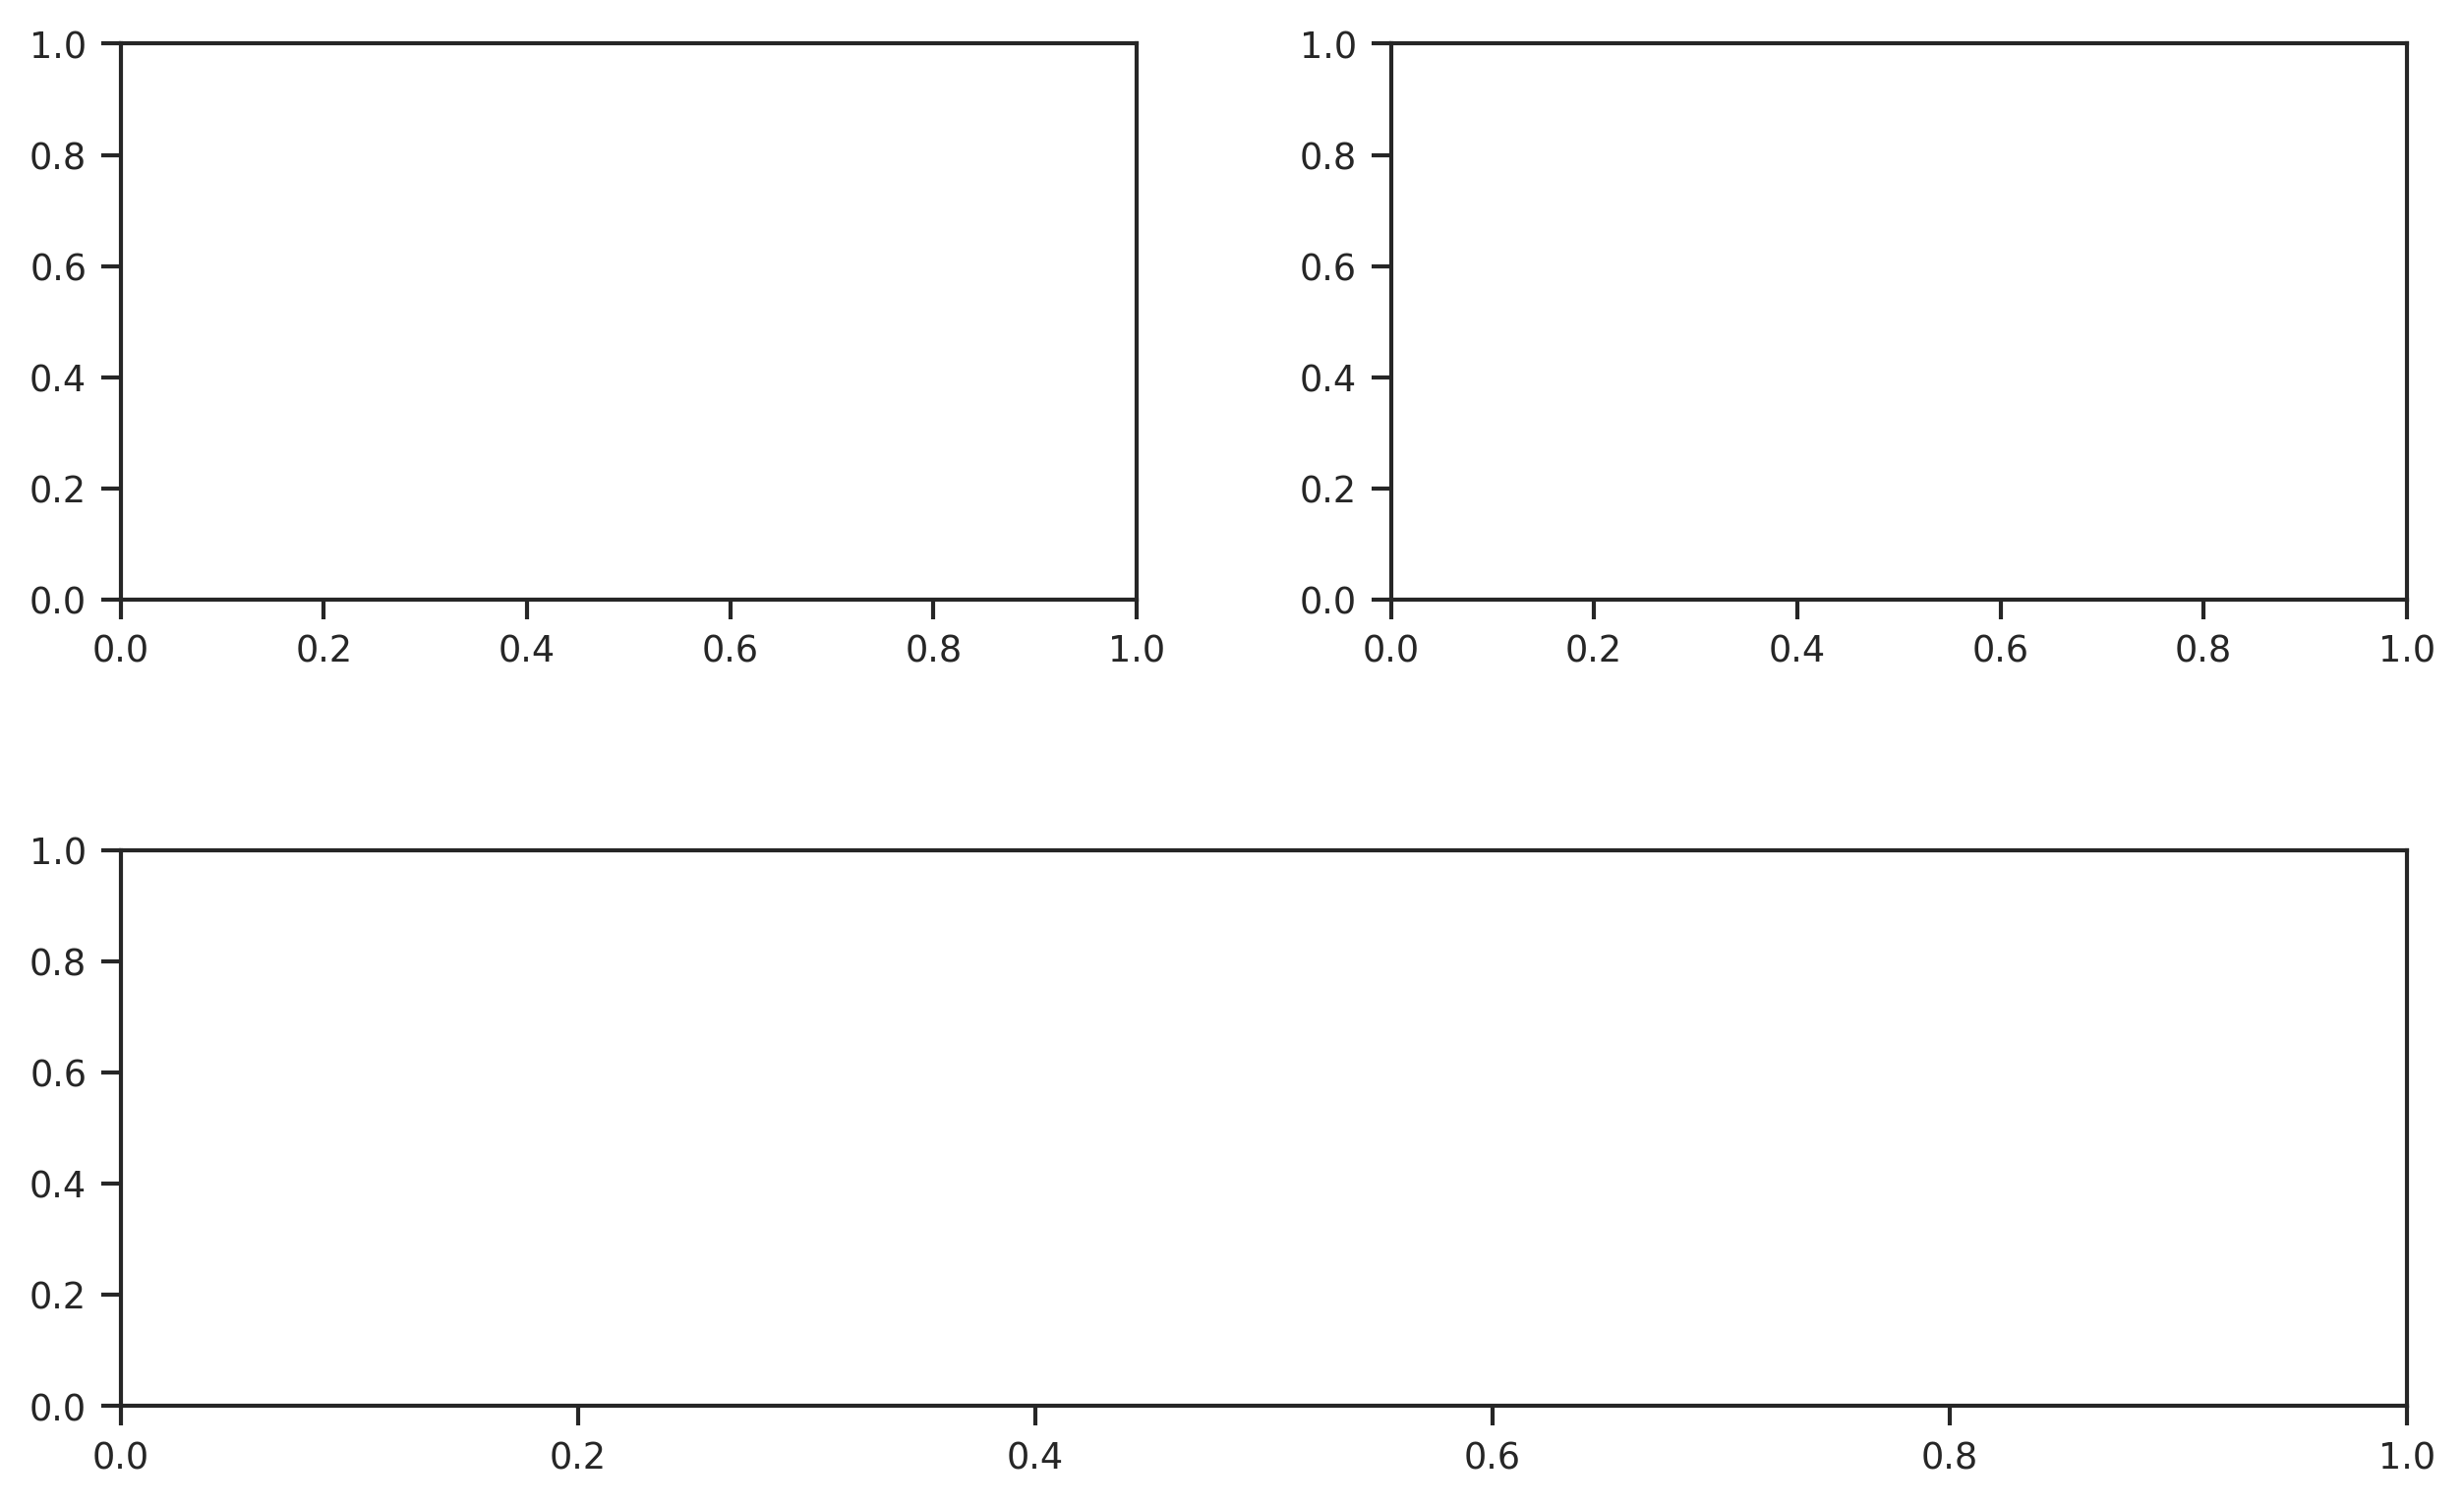

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import numpy as np
from matplotlib.patches import Rectangle
import pandas as pd

# ========== 全局样式设置 ==========
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
sns.set_theme(style="ticks", context="paper")

# 自定义调色板（与第一个图一致）
custom_palette = [
    '#8A9DBA',  # Silver Blue
    '#5C7AA7',  # Light Steel Blue
    '#2E5894',  # Deep Blue
    '#C0392B',  # Red
    '#27AE60'   # Green
]

# ========== 字体大小统一设置 ==========
label_fontsize = 10
tick_labelsize = 10
legend_fontsize = 10
title_fontsize = 10

# ========== 创建图形：紧凑布局 ==========
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    2, 2,
    figsize=(10, 6),   
    dpi=300,
    gridspec_kw={'height_ratios': [1, 1], 'width_ratios': [1, 1], 'hspace': 0.45, 'wspace': 0.25}
)

# 删除第四个子图
fig.delaxes(ax4)

# 重新获取第三个子图作为跨列子图
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2, fig=fig)

# ========== 子图 A：ROC 曲线 ==========
# for model_name, data in results.items():
#     ax1.plot(data['mean_fpr'], data['mean_tpr'],
#             #  color=custom_palette[list(results.keys()).index(model_name)],
#             color=colors[model_name],
#              lw=2,
#              label=f'{model_name} (AUC = {data["mean_auc"]:.3f})')

# # ax1.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
# ax1.set_xlim([0.0, 1.0])
# ax1.set_ylim([0.0, 1.0])
# ax1.set_xlabel('False Positive Rate (FPR)', fontsize=label_fontsize)
# ax1.set_ylabel('True Positive Rate (TPR)', fontsize=label_fontsize)
# ax1.grid(True, axis='y', linestyle='--', alpha=0.3, color='gray', linewidth=0.8)
# ax1.set_axisbelow(True)
# ax1.tick_params(axis='both', labelsize=tick_labelsize, color='#333333')
# ax1.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
# ax1.set_xticks(np.arange(0, 1.2, 0.2))
# ax1.set_yticks(np.arange(0, 1.2, 0.2))
# # ax1.text(-0.06, 1.08, 'A', transform=ax1.transAxes, fontsize=title_fontsize, fontweight='bold', va='top')

# ========== 子图 B：PRC 曲线 ==========
# for model_name, data in results.items():
#     ax2.plot(data['mean_recall'], data['mean_precision'],
#             #  color=custom_palette[list(results.keys()).index(model_name)],
#              color=colors[model_name],
#              lw=2,
#              label=f'{model_name} (Area = {data["mean_pr_auc"]:.3f})')

# ax2.set_xlim([0.0, 1.0])
# ax2.set_ylim([0.0, 1.0])
# ax2.set_xlabel('Recall', fontsize=label_fontsize)
# ax2.set_ylabel('Precision', fontsize=label_fontsize)
# ax2.grid(True, axis='y', linestyle='--', alpha=0.3, color='gray', linewidth=0.8)
# ax2.set_axisbelow(True)
# ax2.tick_params(axis='both', labelsize=tick_labelsize, color='#333333')
# ax2.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
# ax2.set_xticks(np.arange(0, 1.2, 0.2))
# ax2.set_yticks(np.arange(0, 1.2, 0.2))
# # ax2.text(-0.06, 1.08, 'B', transform=ax2.transAxes, fontsize=title_fontsize, fontweight='bold', va='top')

# ========== 子图 C：箱线图 ==========

bar = sns.barplot(
    x="Metric", y="Value", hue="Model", data=df,
    palette=custom_palette,  # 使用与子图12一致的颜色
    ax=ax3,
    linewidth=0,
    width=0.4,
    saturation=1.0,
    dodge=True,
    gap=0.15,
    errorbar=None  # 明确指定不显示误差棒
)

ax3.set_xlabel('', fontsize=label_fontsize)
ax3.set_ylabel('Performance', fontsize=label_fontsize)
ax3.set_ylim(0.3, 0.9)

ax3.set_yticks(np.arange(0.3, 0.902, 0.1))

ax3.tick_params(axis='both', labelsize=tick_labelsize, color='#333333')
ax3.grid(True, axis='y', linestyle='--', alpha=0.3, color='gray', linewidth=0.8)
ax3.set_axisbelow(True)
# ax3.text(-0.03, 1.02, 'C', transform=ax3.transAxes, fontsize=title_fontsize, fontweight='bold', va='top')

# ========== 图例统一设置 ==========
# legend1 = ax1.legend(
#     fontsize=legend_fontsize,
#     frameon=False,
#     loc='lower right',
#     bbox_to_anchor=(1, 0.05)
# )

# legend2 = ax2.legend(
#     fontsize=legend_fontsize,
#     frameon=False,
#     loc='lower right',
#     bbox_to_anchor=(1, 0.05)
# )


ax.legend(
    custom_patches,
    labels,
    loc='upper center',
    ncol=3,  # 横向排列
    fontsize=10,
    title_fontsize=11,
    frameon=False,
    bbox_to_anchor=(0.5, 1.17)  # 调整位置到图表上方
)


labels = ['Expression-aware embeddings', 'General embeddings']
ax3.legend(
    custom_patches,
    labels,
    fontsize=legend_fontsize,
    frameon=False,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.18),
    ncol=4
)
# 去掉上边框和右边框
sns.despine(ax=ax3, top=True, right=True)

# ========== 布局与保存 ==========
# plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.tight_layout(rect=[0, 0.06, 1, 0.92])
plt.savefig("roc_prc_boxplot_unified.pdf", dpi=300, bbox_inches='tight')
plt.savefig("roc_prc_boxplot_unified.png", dpi=300, bbox_inches='tight')
plt.show()

In [26]:
df

,Metric,Mean,Method
0,AUC,0.8170,special_embeddings
1,ACC,0.7190,special_embeddings
2,F1,0.6760,special_embeddings
3,MCC,0.4510,special_embeddings
4,AUC,0.7549,general_embeddings
5,ACC,0.6742,general_embeddings
6,F1,0.6436,general_embeddings
7,MCC,0.3836,general_embeddings


In [36]:
df

,Metric,Value,Method
0,AUC,0.8170,Expression-aware embeddings
1,ACC,0.7190,Expression-aware embeddings
2,F1,0.6760,Expression-aware embeddings
3,MCC,0.4510,Expression-aware embeddings
4,AUC,0.7549,General embeddings
5,ACC,0.6742,General embeddings
6,F1,0.6436,General embeddings
7,MCC,0.3836,General embeddings


In [ ]:

# 创建测试数据
# data = {
#     'Metric': ['AUC', 'ACC', 'F1', 'MCC', 'AUC', 'ACC', 'F1', 'MCC'],
#     'Value': [0.8170, 0.7190, 0.6760, 0.4510, 0.7549, 0.6742, 0.6436, 0.3836],
#     'Method': ['special_embeddings', 'special_embeddings', 'special_embeddings', 'special_embeddings', 
#                'general_embeddings', 'general_embeddings', 'general_embeddings', 'general_embeddings']
# }
# df = pd.DataFrame(data)

# 重命名Method列的值以匹配图例标签
# df['Method'] = df['Method'].replace({
#     'special_embeddings': 'Expression-aware embeddings',
#     'general_embeddings': 'General embeddings'
# })

DataFrame结构:
  Metric   Value                       Method
0    AUC  0.8170  Expression-aware embeddings
1    ACC  0.7190  Expression-aware embeddings
2     F1  0.6760  Expression-aware embeddings
3    MCC  0.4510  Expression-aware embeddings
4    AUC  0.7549           General embeddings
5    ACC  0.6742           General embeddings
6     F1  0.6436           General embeddings
7    MCC  0.3836           General embeddings


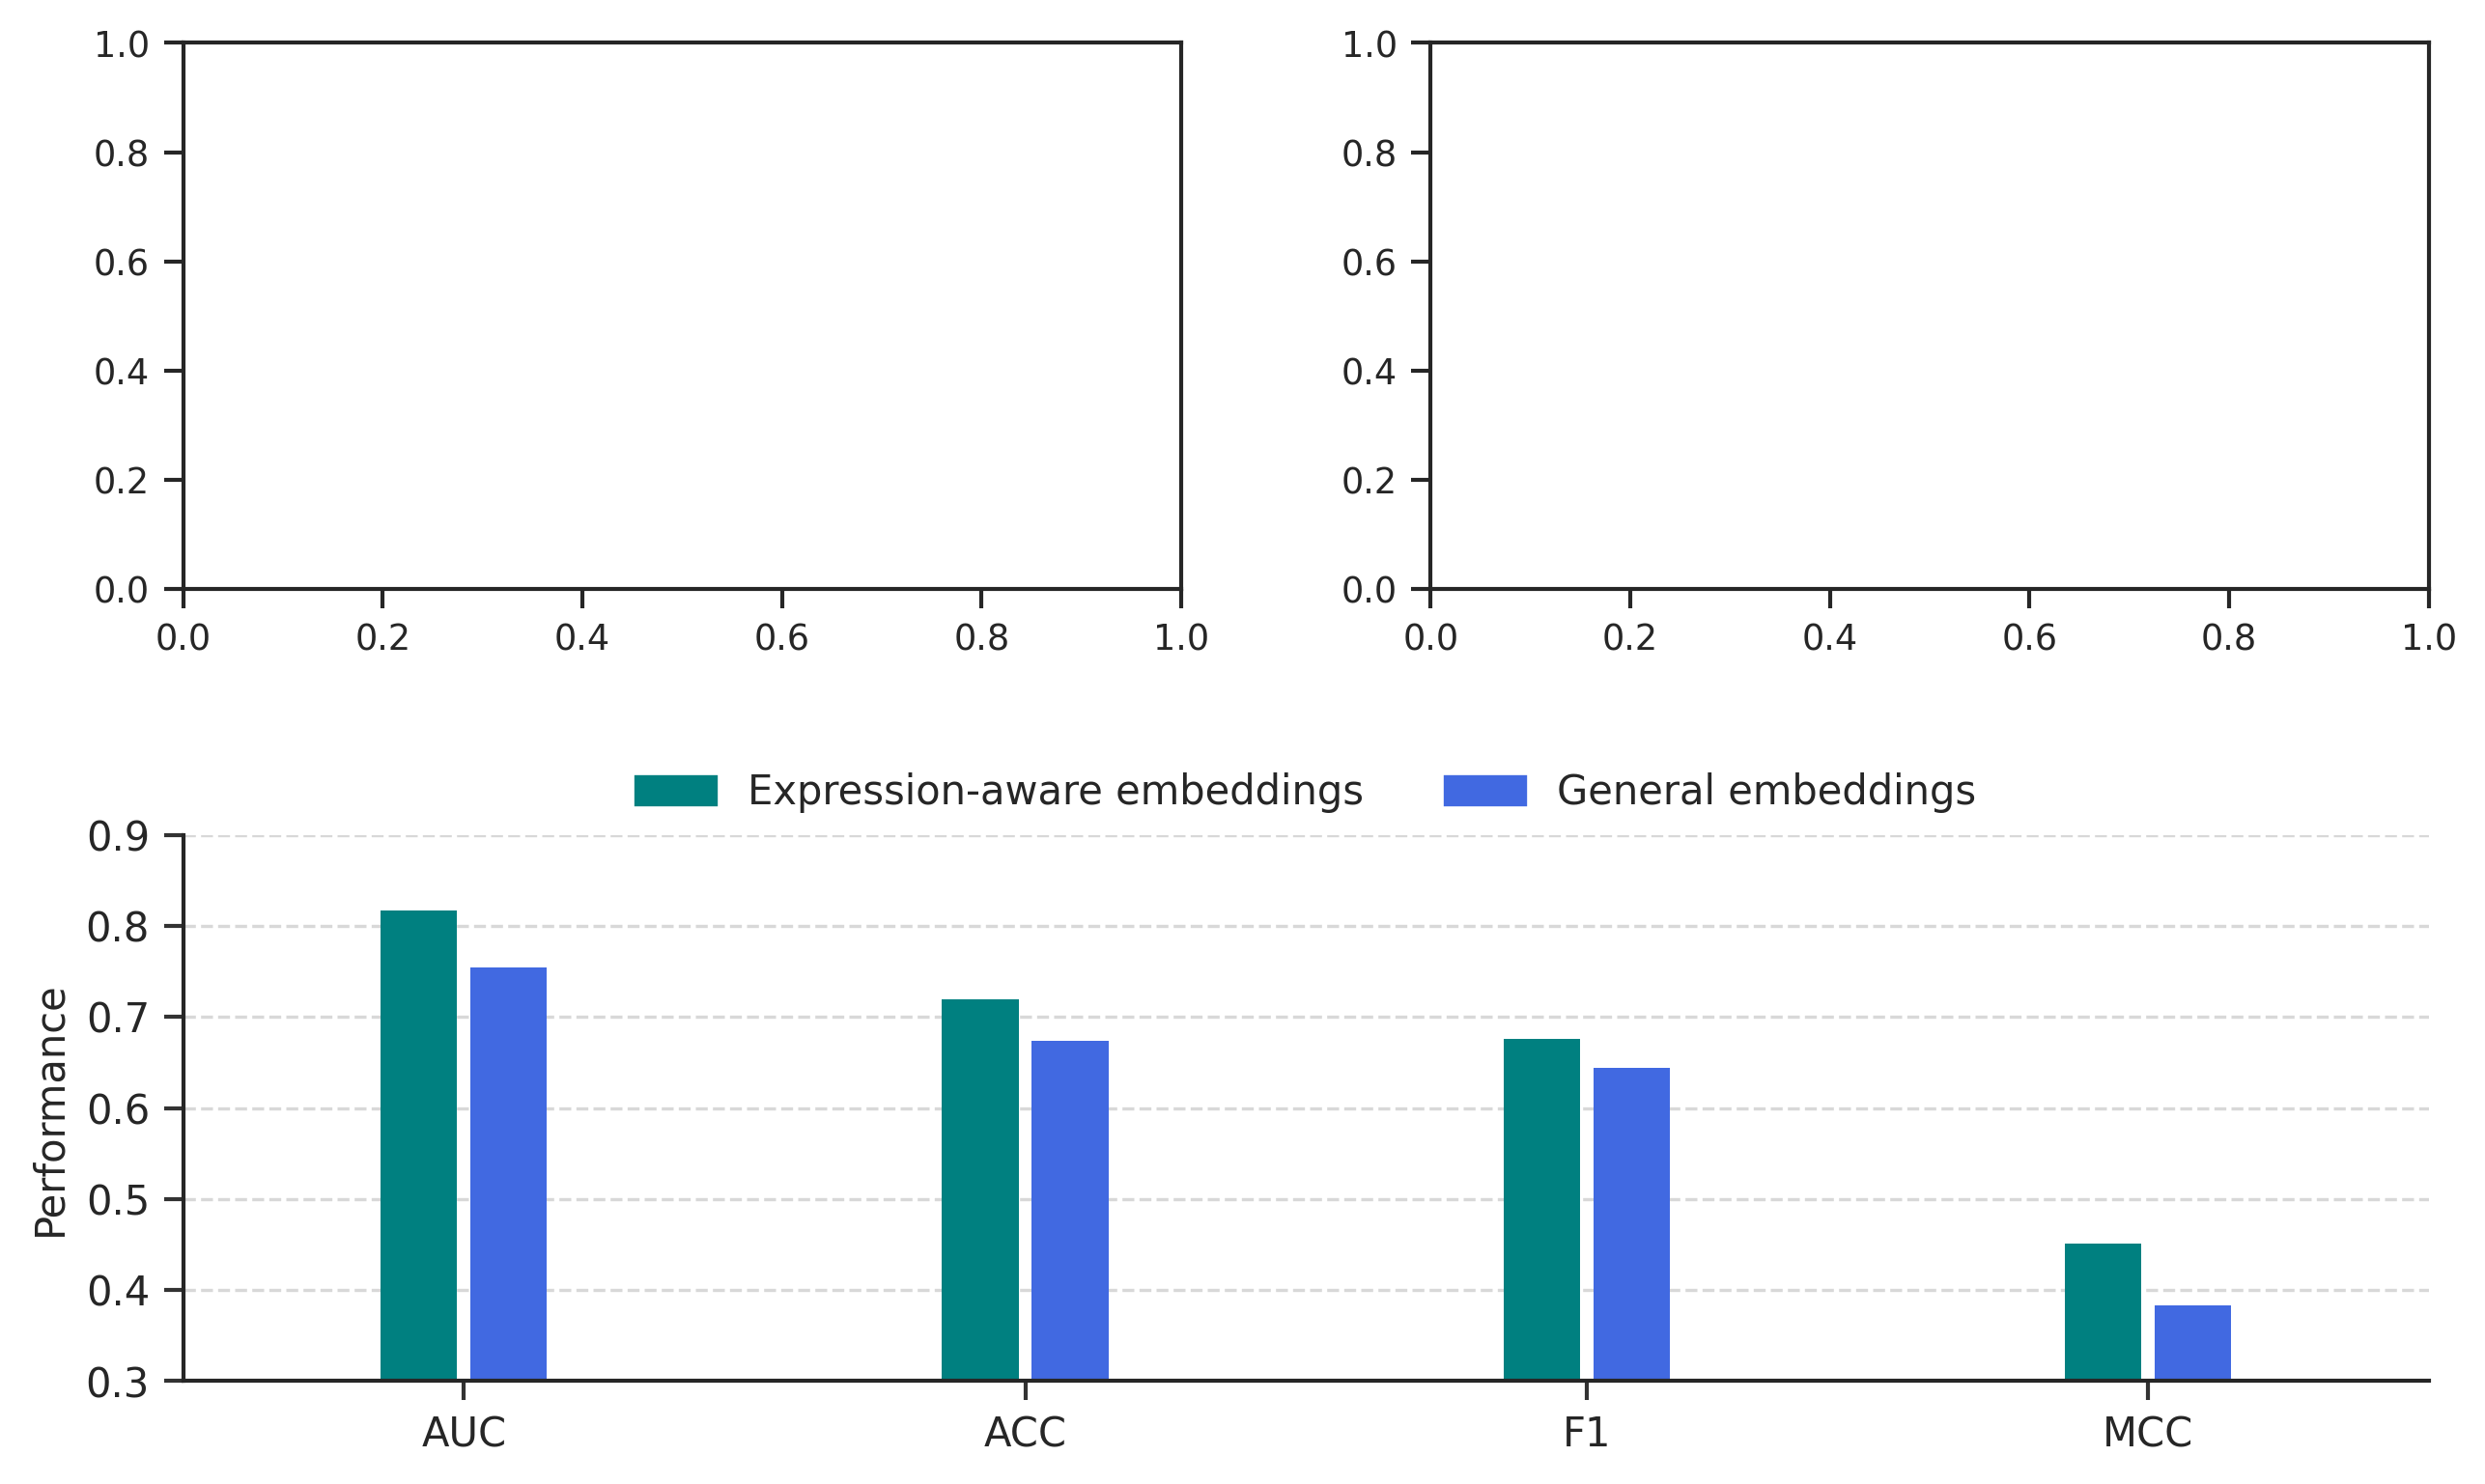

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import numpy as np
from matplotlib.patches import Rectangle, Patch
import pandas as pd

# ========== 全局样式设置 ==========
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
sns.set_theme(style="ticks", context="paper")

# 自定义调色板（与第一个图一致）
custom_palette = [
    '#008080',  # Bright Blue - TLC-EPE
    '#4169E1',  # Purple - TLCP-EPE
    '#B22222',   # Orange - TLP-EPE
    '#A9A9A9'
]

# ========== 字体大小统一设置 ==========
label_fontsize = 10
tick_labelsize = 10
legend_fontsize = 10
title_fontsize = 10

# ========== 创建图形：紧凑布局 ==========
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    2, 2,
    figsize=(10, 6),   
    dpi=300,
    gridspec_kw={'height_ratios': [1, 1], 'width_ratios': [1, 1], 'hspace': 0.45, 'wspace': 0.25}
)

# 删除第四个子图
fig.delaxes(ax4)

# 重新获取第三个子图作为跨列子图
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2, fig=fig)

# ========== 子图 C：箱线图 ==========


print("DataFrame结构:")
print(df)

bar = sns.barplot(
    x="Metric", y="Value", hue="Method", data=df,
    palette=custom_palette,  # 使用前两个颜色
    ax=ax3,
    linewidth=0,
    width=0.32,
    saturation=1.0,
    dodge=True,
    errorbar=None,  # 明确指定不显示误差棒
    gap=0.15
)

# bar = sns.barplot(
#     x="Metric", y="Mean", hue="Method", data=df,
#     palette=custom_palette,
#     ax=ax,
#     linewidth=0,
#     width=0.33,
#     saturation=1.0,
#     dodge=True,
#     gap=0.15
# )



ax3.set_xlabel('', fontsize=label_fontsize)
ax3.set_ylabel('Performance', fontsize=label_fontsize)
ax3.set_ylim(0.3, 0.9)

ax3.set_yticks(np.arange(0.3, 0.902, 0.1))

ax3.tick_params(axis='both', labelsize=tick_labelsize, color='#333333')
ax3.grid(True, axis='y', linestyle='--', alpha=0.3, color='gray', linewidth=0.8)
ax3.set_axisbelow(True)

# 创建自定义图例
custom_patches = [
    Patch(color=custom_palette[0], label='Expression-aware embeddings'),
    Patch(color=custom_palette[1], label='General embeddings')
]

labels = ['Expression-aware embeddings', 'General embeddings']
ax3.legend(
    custom_patches,
    labels,
    fontsize=legend_fontsize,
    frameon=False,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.18),
    ncol=2
)

# 去掉上边框和右边框
sns.despine(ax=ax3, top=True, right=True)

# ========== 布局与保存 ==========
plt.tight_layout(rect=[0, 0.06, 1, 0.92])
plt.savefig("roc_prc_boxplot_unified.pdf", dpi=300, bbox_inches='tight')
plt.savefig("roc_prc_boxplot_unified.png", dpi=300, bbox_inches='tight')
plt.show()